In [22]:
import argparse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

def parse() -> argparse.Namespace:
    parser = argparse.ArgumentParser()

    parser.add_argument(
        "dataset",
        type=str,
        help="filename to get describe for"
    )
    return parser.parse_args()

In [23]:
csv_file = "dataset_train.csv"
# csv_file = "dataset_test.csv"
data = pd.read_csv(csv_file)

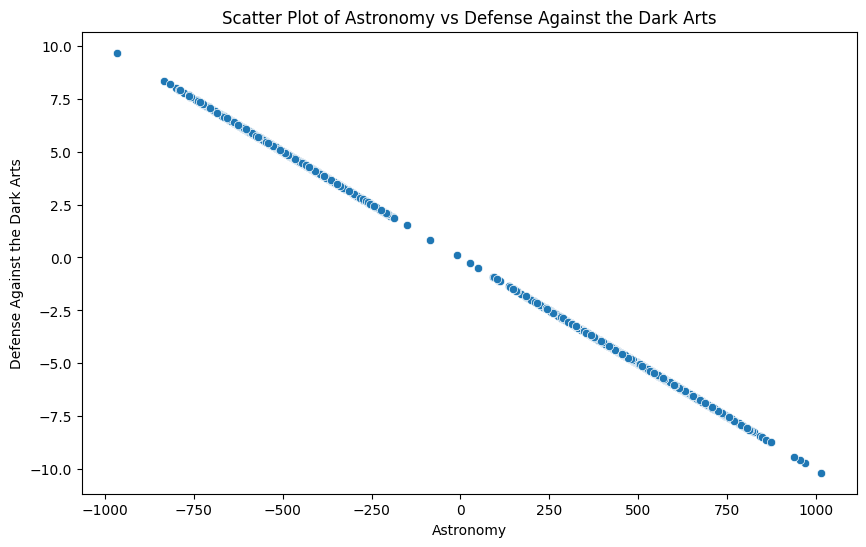

In [24]:
le = LabelEncoder()

for column in data.columns:
    if data[column].dtype == type(object):
        data[column] = le.fit_transform(data[column])

correlation_matrix = data.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Heatmap of Correlation Matrix')
# plt.show()


correlation_matrix_abs = correlation_matrix.abs()
for i in range(len(correlation_matrix_abs)):
    correlation_matrix_abs.iat[i, i] = 0
max_corr = correlation_matrix_abs.unstack().idxmax()

# Extract the two features with the highest correlation
feature1, feature2 = max_corr

# Plot the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data[feature1], y=data[feature2])
plt.title(f'Scatter Plot of {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

From the results extracted from the correlation matrix, we can  determine that Astronomy and DADA are the most similar features.